In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

age : 나이

sex : 성별

cp : 가슴 통증 종류

treshbps : 안정시 혈압

chol : 콜레스테롤

fbs : 공복시 혈당 (1:120초과,2:120이하)

restecg : 안정시 심전도 0:normal, 1:ST-T파 이상, 2:좌심실 비대

thalach : 최대 심박수

exang : 운동 유발 협심증 1:yes, 0:no

oldpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment 1:upsloping, 2:flat, 3:downsloping

ca : 조영제에 착색된 혈관수

thal : 3:normal, 6:고정 결함, 7:가역적 결함

HeartDisease : 심장병 유무


In [5]:
column_name = ['age', 'sex', 'cp', 'treshbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'HeartDisease']
raw_data = pd.read_excel('./heart-disease.xlsx', header = None, names = column_name)
raw_data

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshbps      303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  thal          303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [7]:
clean_data = raw_data.replace('?', np.nan)
clean_data.isnull().sum()

age             0
sex             0
cp              0
treshbps        0
chol            1
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
thal            2
HeartDisease    0
dtype: int64

In [8]:
clean_data.dropna(inplace = True)
clean_data.reset_index(inplace = True)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         296 non-null    int64  
 1   age           296 non-null    int64  
 2   sex           296 non-null    int64  
 3   cp            296 non-null    int64  
 4   treshbps      296 non-null    int64  
 5   chol          296 non-null    float64
 6   fbs           296 non-null    int64  
 7   restecg       296 non-null    int64  
 8   thalach       296 non-null    int64  
 9   exang         296 non-null    int64  
 10  oldpeak       296 non-null    float64
 11  slope         296 non-null    int64  
 12  ca            296 non-null    float64
 13  thal          296 non-null    float64
 14  HeartDisease  296 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 34.8 KB


In [9]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,296.0,150.172297,87.046144,0.0,74.75,149.5,225.25,301.0
age,296.0,54.500000,9.035898,29.0,48.00,56.0,61.00,77.0
sex,296.0,0.675676,0.468915,0.0,0.00,1.0,1.00,1.0
cp,296.0,3.155405,0.965246,1.0,3.00,3.0,4.00,4.0
treshbps,296.0,131.733108,17.779813,94.0,120.00,130.0,140.00,200.0
chol,296.0,247.412162,52.074644,126.0,211.00,243.0,276.25,564.0
fbs,296.0,0.145270,0.352970,0.0,0.00,0.0,0.00,1.0
restecg,296.0,0.986486,0.994810,0.0,0.00,0.5,2.00,2.0
thalach,296.0,149.668919,22.948989,71.0,133.75,153.0,166.00,202.0
exang,296.0,0.324324,0.468915,0.0,0.00,0.0,1.00,1.0


In [10]:
training_data = clean_data.loc[:, 'age':'thal']
target = clean_data[['HeartDisease']]
print(training_data.head())
print(target.head())

   age  sex  cp  treshbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   63    1   1       145  233.0    1        2      150      0      2.3   
1   67    1   4       160  286.0    0        0      108      1      1.5   
2   37    1   3       130  250.0    0        0      187      0      3.5   
3   41    0   2       130  204.0    0        2      172      0      1.4   
4   56    1   2       120  236.0    0        0      178      0      0.8   

   slope   ca  thal  
0      3  0.0   6.0  
1      2  3.0   3.0  
2      3  0.0   3.0  
3      1  0.0   3.0  
4      1  0.0   3.0  
   HeartDisease
0             0
1             1
2             0
3             0
4             0


In [11]:
target.sum()

HeartDisease    136
dtype: int64

In [12]:
target.mean()

HeartDisease    0.459459
dtype: float64

In [13]:
from sklearn.preprocessing import StandardScaler # 표준정규분포/ 표준화 작업 -> 비례적으로 값을 표준화한다
scaler = StandardScaler()
scaled_data = scaler.fit_transform(training_data)
scaled_data = pd.DataFrame(scaled_data, columns = column_name[:-1])
scaled_data.head()

,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.942285,0.692820,-2.236793,0.747441,-0.277228,2.425638,1.020526,0.014451,-0.692820,1.074839,2.264087,-0.718421,0.660262
1,1.385714,0.692820,0.876486,1.592523,0.742265,-0.412263,-0.993312,-1.818794,1.443376,0.386756,0.645320,2.487397,-0.890830
2,-1.939999,0.692820,-0.161274,-0.097641,0.049779,-0.412263,-0.993312,1.629453,-0.692820,2.106963,2.264087,-0.718421,-0.890830
3,-1.496571,-1.443376,-1.199033,-0.097641,-0.835064,-0.412263,1.020526,0.974723,-0.692820,0.300746,-0.973448,-0.718421,-0.890830
4,0.166286,0.692820,-1.199033,-0.661029,-0.219521,-0.412263,-0.993312,1.236615,-0.692820,-0.215316,-0.973448,-0.718421,-0.890830


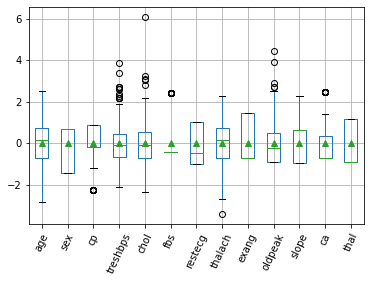

In [14]:
axes = scaled_data.boxplot(column = column_name[:-1], showmeans = True)
axes.set_xticklabels(column_name[:-1], rotation = 65) # 컬럼명을 65도로 돌려서 겹치는걸 방지해준다
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    scaled_data, target, test_size = 0.3)
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('Y_train shape :', Y_train.shape)
print('Y_test shape :', Y_test.shape)
#  x_train, y_train은 각각 훈련에 사용할 입력값, 출력값

X_train shape : (207, 13)
X_test shape : (89, 13)
Y_train shape : (207, 1)
Y_test shape : (89, 1)


In [16]:
model = Sequential() # Sequential 클래스는 Neural Network의 각 층을 순서대로 쌓을 수 있도록 
model.add(Dense(512, input_dim = 13, activation = 'relu')) #Dense 클래스는 (완전 연결된) 하나의 뉴런층을 구현
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu')) # 은닉층 (Hidden layer)의 활성화함수로 ReLU (Rectified Linear Unit)를 사용
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy']) #mse: 에러의 제곱에 평균
fit_hist = model.fit(X_train, Y_train, batch_size=50, 
                     epochs=50, validation_split=0.2, verbose=1)
# 에포크 (epoch)는 주어진 데이터를 한 번 훈련하는 단위
# fit() 메서드는 모델을 훈련하고, 훈련 진행 상황과 현재의 손실값을 반환
# metrics=['accuracy'] 혼동행렬 정확도 계산

Epoch 1/50
4/4 [==============================] - 3s 95ms/step - loss: 0.2213 - accuracy: 0.6424 - val_loss: 0.1724 - val_accuracy: 0.8333
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1418 - accuracy: 0.8667 - val_loss: 0.1351 - val_accuracy: 0.8571
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1119 - accuracy: 0.8667 - val_loss: 0.1257 - val_accuracy: 0.8571
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0942 - accuracy: 0.8788 - val_loss: 0.1295 - val_accuracy: 0.8571
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0882 - accuracy: 0.8848 - val_loss: 0.1347 - val_accuracy: 0.8571
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0822 - accuracy: 0.8970 - val_loss: 0.1391 - val_accuracy: 0.8333
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0768 - accuracy: 0.9152 - val_loss: 0.1424 - val_accuracy: 0.8333
Epoch 8/50
4/4 [===========

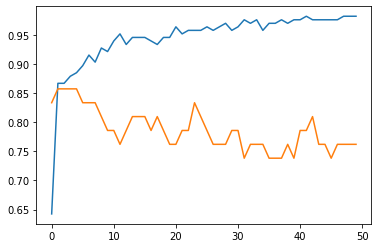

In [18]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

In [19]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Keras DNN model loss :', score[0])
print('Keras DNN model accuracy :', score[1])

Keras DNN model loss : 0.2121885120868683
Keras DNN model accuracy : 0.7640449404716492


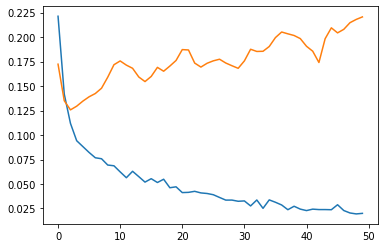

In [20]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred > 0.5)
print(confusion_matrix(Y_test, pred), '\n')
print(f1_score(Y_test, pred, average='micro'))

3/3 [==============================] - 0s 4ms/step
[[44 10]
 [11 24]] 

0.7640449438202248


In [22]:
from sklearn.metrics import classification_report
cr = classification_report(Y_test, pred, output_dict=True)
pd.DataFrame(cr)

,0,1,accuracy,macro avg,weighted avg
precision,0.800000,0.705882,0.764045,0.752941,0.762987
recall,0.814815,0.685714,0.764045,0.750265,0.764045
f1-score,0.807339,0.695652,0.764045,0.751496,0.763417
support,54.000000,35.000000,0.764045,89.000000,89.000000


In [24]:
print(classification_report(Y_test, pred, output_dict = False))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81        54
           1       0.71      0.69      0.70        35

    accuracy                           0.76        89
   macro avg       0.75      0.75      0.75        89
weighted avg       0.76      0.76      0.76        89



In [25]:
my_sample = np.random.randint(89)
sample_data = np.array(X_test.iloc[my_sample])
sample_data = sample_data.reshape(-1, 13)
print(model.predict(sample_data))
print(Y_test.iloc[my_sample])

1/1 [==============================] - 0s 69ms/step
[[0.00084729]]
HeartDisease    1
Name: 257, dtype: int64


In [26]:
clean_data.head()

,index,age,sex,cp,treshbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,HeartDisease
0,0,63,1,1,145,233.0,1,2,150,0,2.3,3,0.0,6.0,0
1,1,67,1,4,160,286.0,0,0,108,1,1.5,2,3.0,3.0,1
2,3,37,1,3,130,250.0,0,0,187,0,3.5,3,0.0,3.0,0
3,4,41,0,2,130,204.0,0,2,172,0,1.4,1,0.0,3.0,0
4,5,56,1,2,120,236.0,0,0,178,0,0.8,1,0.0,3.0,0


In [28]:
category_value = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [29]:
category_df = clean_data[category_value]
category_df

,sex,cp,fbs,restecg,exang,slope,thal
0,1,1,1,2,0,3,6.0
1,1,4,0,0,1,2,3.0
2,1,3,0,0,0,3,3.0
3,0,2,0,2,0,1,3.0
4,1,2,0,0,0,1,3.0
...,...,...,...,...,...,...,...
291,0,4,0,0,1,2,7.0
292,1,1,0,0,0,2,7.0
293,1,4,1,0,0,2,7.0
294,1,4,0,0,1,2,7.0


In [30]:
category_df = pd.get_dummies(category_df, columns = category_df.columns)
category_df

,sex_0,sex_1,cp_1,cp_2,cp_3,cp_4,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0
1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0
2,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
3,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0
4,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,1,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
292,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
293,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,1
294,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
